In [946]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,mean_absolute_percentage_error

from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")
sns.set_context('talk')
sns.set_style("darkgrid")

**Read CSV file as Pandas Dataframe.**

In [947]:
df = pd.read_csv("toyota.csv")

display(df.head())  #head() will show the first 5 rows of the CSV file by default.
display(df.tail())  #tail() will show the first 5 rows of the CSV file by default.

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
6733,IQ,2011,5500,Automatic,30000,Petrol,58.9,1.0
6734,Urban Cruiser,2011,4985,Manual,36154,Petrol,50.4,1.3
6735,Urban Cruiser,2012,4995,Manual,46000,Diesel,57.6,1.4
6736,Urban Cruiser,2011,3995,Manual,60700,Petrol,50.4,1.3
6737,Urban Cruiser,2011,4495,Manual,45128,Petrol,50.4,1.3


**Full information of the dataframe.**

In [948]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


**Count the unique values of the "transmission" Column** 

In [949]:
print(df["transmission"].unique()) 
print(df["transmission"].value_counts())  

['Manual' 'Automatic' 'Semi-Auto' 'Other']
Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64


**Pie Chart for the "tranmission" Plot.**

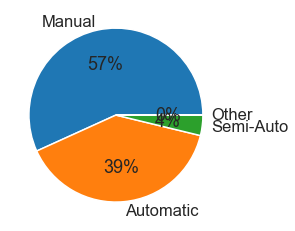

In [950]:
df["transmission"].value_counts().plot(kind="pie",
                                autopct= "%1.0f%%")    #for creating pie chart.
plt.ylabel("")  #It is used for remove the label of the y-axis.
plt.show()     # it will show the figure only.

In [951]:
print(df["transmission"].value_counts())

print(type(df["transmission"].value_counts()))

df_transmission  = pd.DataFrame(df["transmission"].value_counts()) #This command ["pd.DataFrame"] converts a seris to DataFrame.

display(df_transmission.head())  #head() will show the first 5 rows of the CSV file by default. 

print(df_transmission.index)     #express the index of the dataframe.

print(df_transmission.columns)   #express the column of the dataframe.

Manual       3826
Automatic    2657
Semi-Auto     254
Other           1
Name: transmission, dtype: int64
<class 'pandas.core.series.Series'>


,transmission
Manual,3826
Automatic,2657
Semi-Auto,254
Other,1


Index(['Manual', 'Automatic', 'Semi-Auto', 'Other'], dtype='object')
Index(['transmission'], dtype='object')


In [952]:
df_transmission = pd.DataFrame(df["transmission"].value_counts())

df_transmission = df_transmission.reset_index()        # This command ("reset_index()") is used to reset the index of the dataframe.

df_transmission = df_transmission.rename(columns= {"index":"Transmission",
                                                    "transmission":"Num of Cars"})  # The command is used to rename the column name.

display(df_transmission)


,Transmission,Num of Cars
0,Manual,3826
1,Automatic,2657
2,Semi-Auto,254
3,Other,1


**Barplot for the "tranmission" column.**

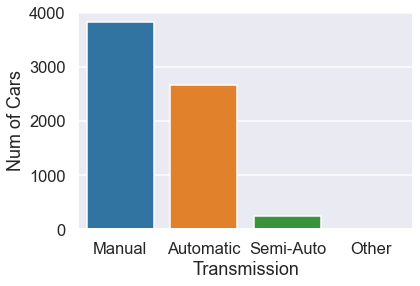

In [953]:
sns.barplot(x="Transmission", 
            y="Num of Cars",
            data = df_transmission) 
plt.show()

**Which is Better between Barplot and Pi Chart and why?**

**Answer:** Between barplot and pie chart, a bar plot is better than a pie chart.In barplot we can clearly understand what kind of information the plot carries. There are no values in the x label that overlap with another value. But from the pie chart, we see that the information is not easily understandable. The portion of "other" and "semi-auto" overlap with each other, so we can say that a barplot is better than a pie chart, which is very clear for getting information.

**Scatter Plot, Regression Plot, Pair Plot**

In [954]:
df = pd.read_csv("toyota.csv")

display(df.head())  #head() will show the first 5 rows of the CSV file by default.


,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


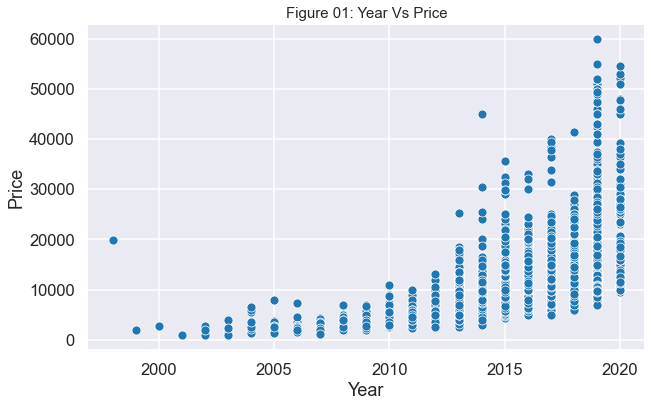

In [955]:
plt.figure(figsize= (10,6))

sns.scatterplot(x= "year", y= "price" , data =df)

plt.title("Figure 01: Year Vs Price", fontsize=15)   #this command is used for giving a title to the figure

plt.xlabel('Year',fontsize=18)    #used for rename & resize the variable of x-axis

plt.ylabel('Price',fontsize=18)  #used for rename & resize the variable of y-axis.

plt.show()


In figure 1, this is a scatter plot of year vs price.In this plot, the price of cars doesn't have any direct relationship with the year.So there is no correlation between the x-axis and y-axis.

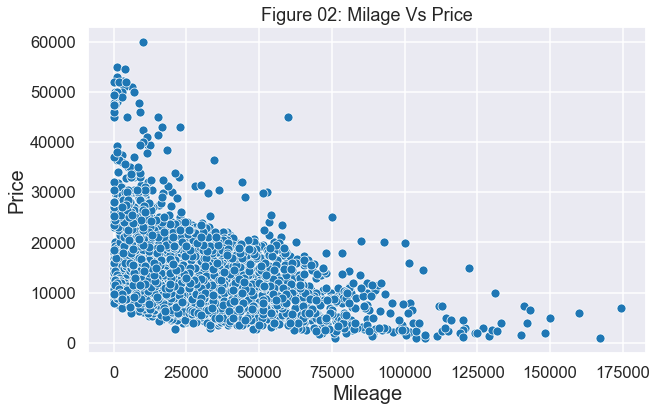

In [956]:
plt.figure(figsize=(10,6))
sns.scatterplot(x = "mileage" , y= "price" , data = df)

plt.title("Figure 02: Milage Vs Price", fontsize=18)    

plt.xlabel('Mileage', fontsize=20)  
plt.ylabel('Price', fontsize=20)    
plt.show()

In figure 2, this is a scatter plot of Mileage vs Price. Scatter plots shows the correlation between the x-axis and y-axis. In this plot Mileage and Price shows a negative correlation because the value of the y-axis is reduced with the increase of the x-axis.

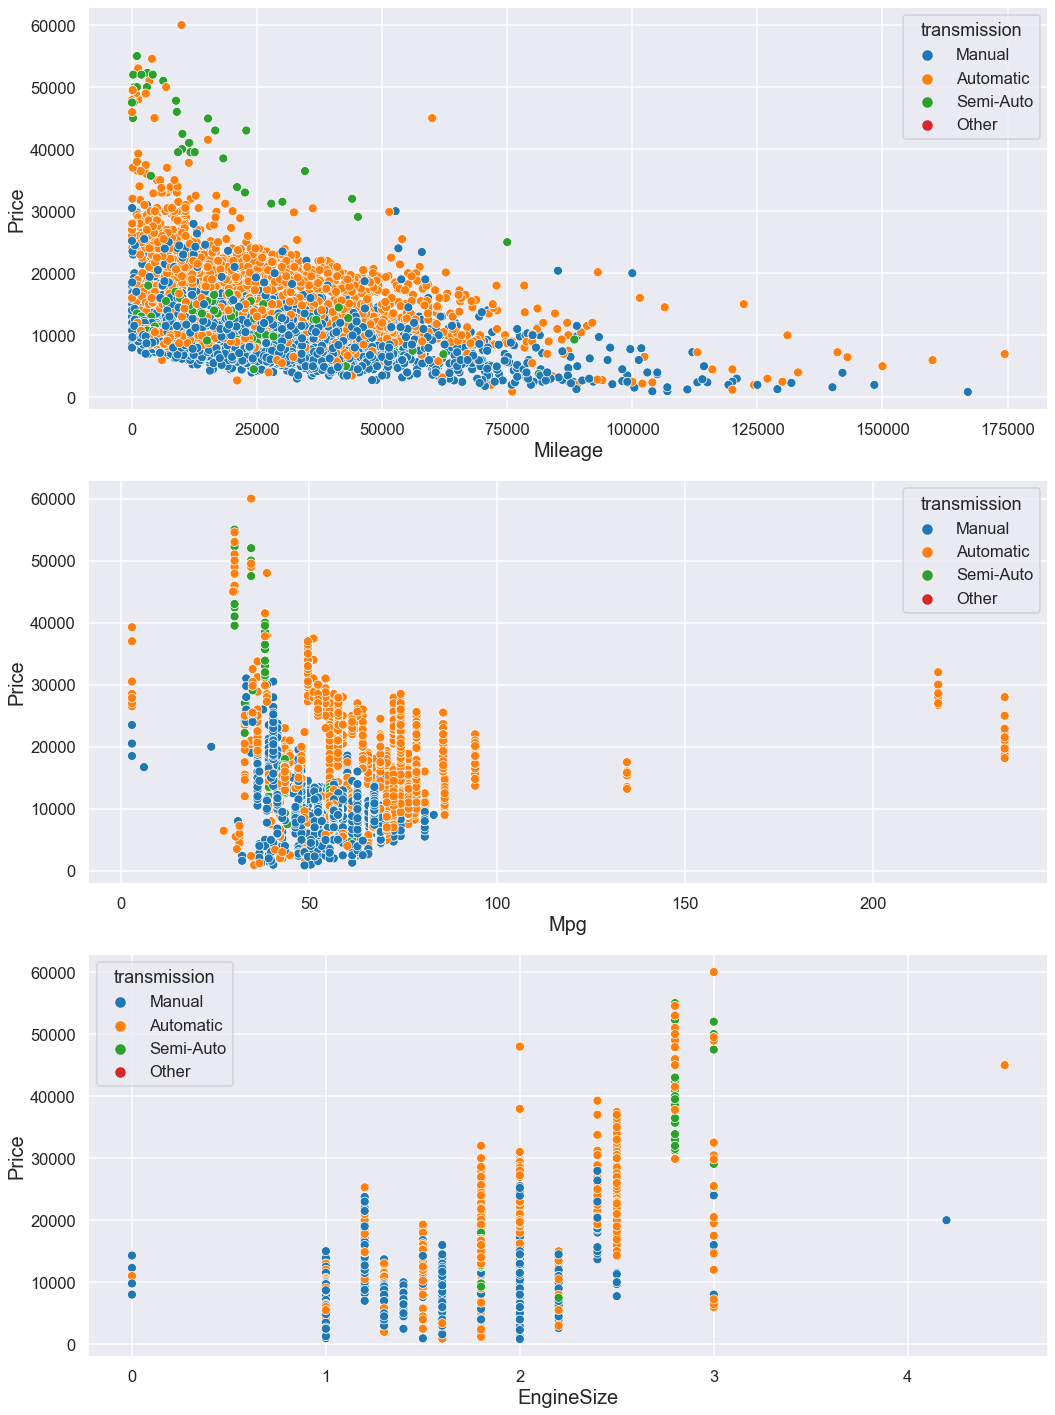

In [957]:
plt.figure(figsize= (15,20))

plt.subplot(3,1,1)
sns.scatterplot(x = "mileage", y="price", data = df , hue = "transmission")  # "hue" has been used to see the relationship between price and mileage and transmission
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,2)
sns.scatterplot(x = "mpg", y="price", data = df, hue = "transmission")
plt.xlabel("Mpg", fontsize = 20)
plt.ylabel("Price", fontsize = 20)

plt.subplot(3,1,3)
sns.scatterplot(x= "engineSize", y="price", data =df, hue ="transmission") 
plt.xlabel("EngineSize", fontsize = 20)  # used for rename & resize the variable of x-axis.
plt.ylabel("Price", fontsize = 20)      # used for rename & resize the variable of y-axis.


plt.tight_layout()  # Padding between the figure edge and the edges of subplots.used to create a gap between two subplots to understand the labeling properly.

plt.show()

The upper plot is known as a subplot as there are more than one plot in this plot.In this subplot postion 1 shows the plot of mileage vs price.here, The cars that run manually have lower prices and the price of the car that runs automatically is in the medium range. Cars with semi-auto transmission have the highest price. This plot shows a negative correlation as the price is reduced with the increase of mileage.But In positions 2 and 3,From the plots of these two positions, it is not possible to determine whether there is any relation between engineSize and MPG with the price.So, there is no correlation.

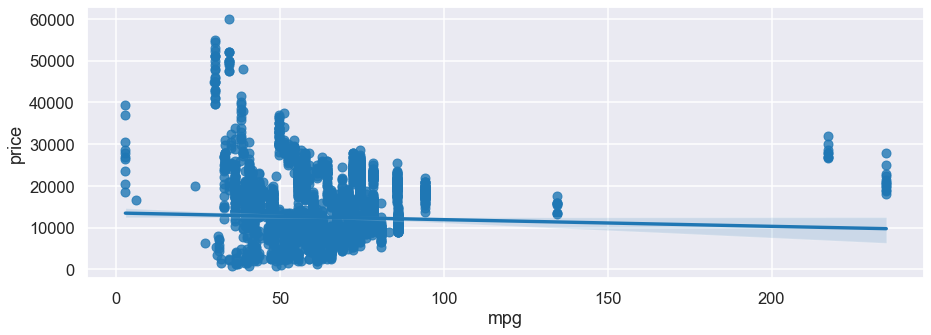

In [958]:
plt.figure(figsize=(15,5))

sns.regplot(x = "mpg", y ="price" , data=df)

plt.show()


It is a regression plot.The straight line represented the trend line of this plot.This straight line indicates a correlation between the x and y axes.It is not possible to determine whether there is any relationship between the X and Y axes in this figure.

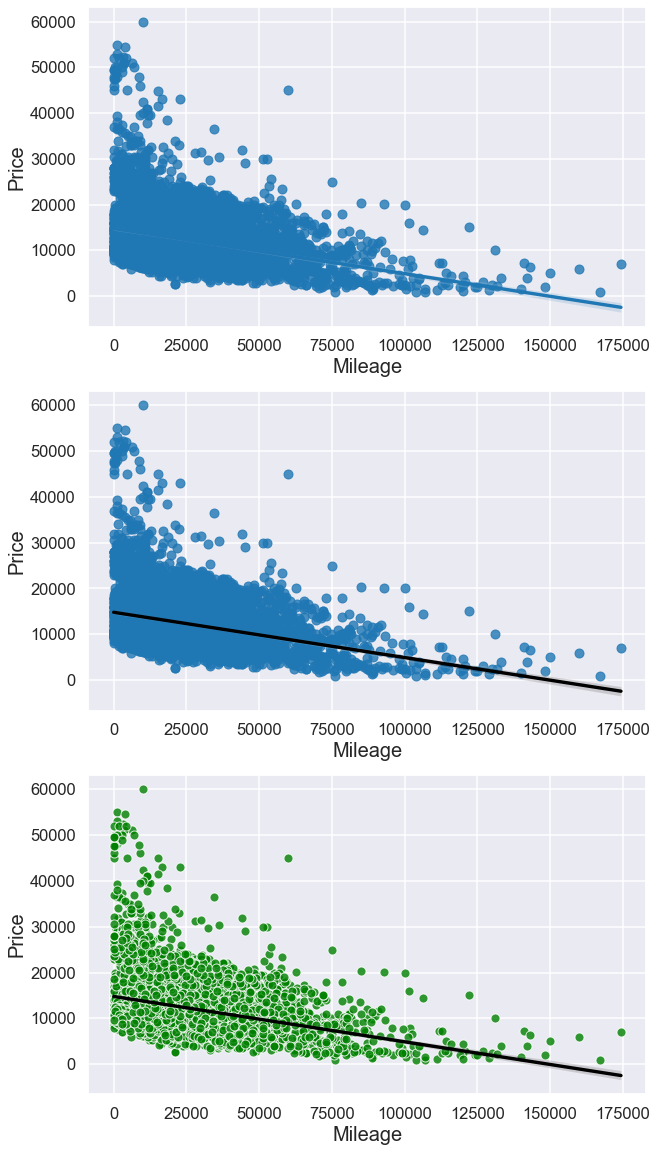

In [959]:
plt.figure(figsize= (10,20))

plt.subplot(3,1,1)
sns.regplot(x = "mileage", y="price", data = df)  # "hue" has been used to see the relationship between price and mileage and transmission
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,2)
sns.regplot(x = "mileage", y="price", data = df, line_kws = {"color":"black"}) #"line_kws" is used to change color of slope.
plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)


plt.subplot(3,1,3)
sns.regplot(x = "mileage", y="price", data = df, scatter_kws= {"color":"green" , "edgecolor":"white"}, line_kws = {"color":"black"}) # "scatter_kws" used for change any characteristic of the scatter plot

plt.xlabel("Mileage", fontsize = 20)
plt.ylabel("Price", fontsize = 20)  # used for rename & resize the variable of y-axis.

plt.show()

The figure above shows the trend line between "price" vs. "mileage". This trend line shows that there is a correlation between price and mileage. As the value of the Y axis decreases with increasing the value of the X axis in this plot, the slope of this straight line is along the negative X axis. So there is a negative co-relation between price and mileage. In the 1st and 2nd position of this subplot there is no differenciation between the points of SCATTER plot. So for better understanding the color of the edges of the dots has been changed using "scatter_kws".

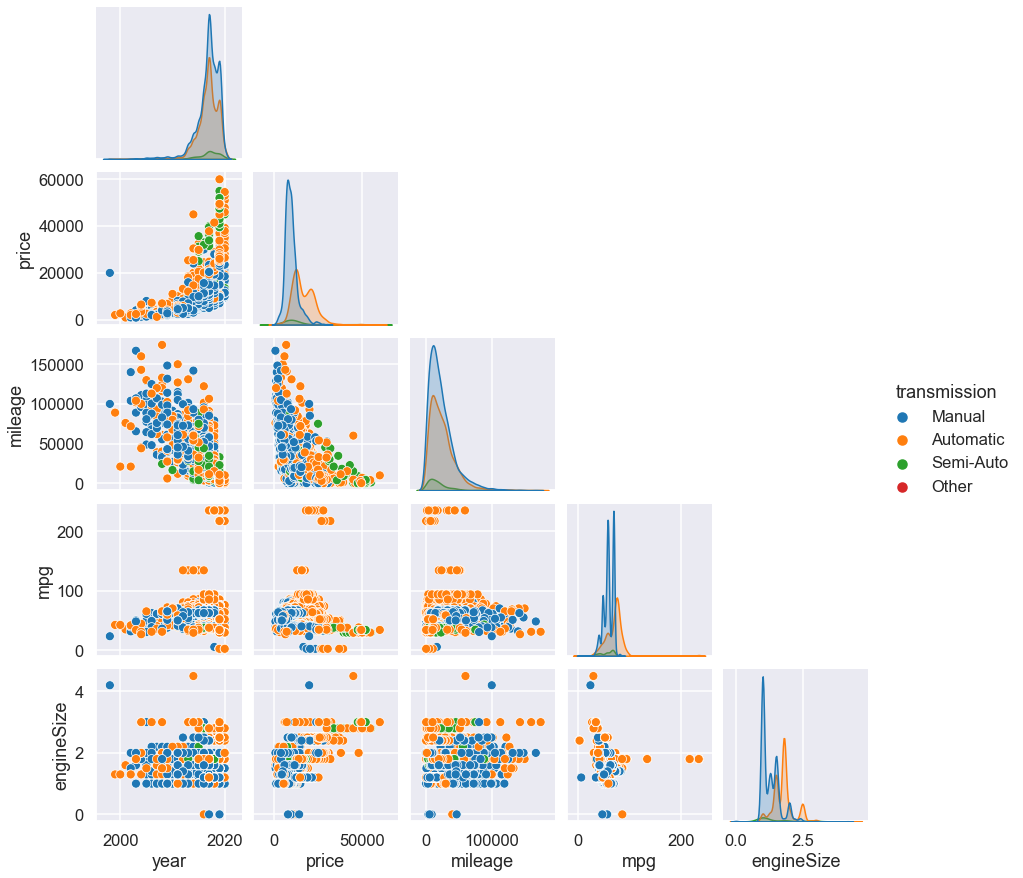

In [960]:
sns.pairplot(df, corner =True, hue = "transmission")

In pairplot, the number of rows and columns are same as the number of numeric variables in Dataset.Since this Dataset has 5 numerical variables, there are 5 rows and columns in this pairplot.Here every two numeric variables will be related to each other.It is seen from the pairplot that there is a negative correlation of mileage with the price.

In [961]:
display(df["engineSize"].value_counts())    #for find the value of "engineSize"

1.0    2059
1.5    1423
1.8    1289
1.3     601
2.0     398
1.2     303
2.5     249
1.6     169
2.4      70
2.2      58
1.4      40
2.8      36
3.0      35
0.0       6
4.2       1
4.5       1
Name: engineSize, dtype: int64

In [962]:
display(df.describe()) # this commad is used for describe the whole data numeric value.

,year,price,mileage,mpg,engineSize
count,6738.000000,6738.000000,6738.000000,6738.000000,6738.000000
mean,2016.748145,12522.391066,22857.413921,63.042223,1.471297
std,2.204062,6345.017587,19125.464147,15.836710,0.436159
min,1998.000000,850.000000,2.000000,2.800000,0.000000
25%,2016.000000,8290.000000,9446.000000,55.400000,1.000000
50%,2017.000000,10795.000000,18513.000000,62.800000,1.500000
75%,2018.000000,14995.000000,31063.750000,69.000000,1.800000
max,2020.000000,59995.000000,174419.000000,235.000000,4.500000


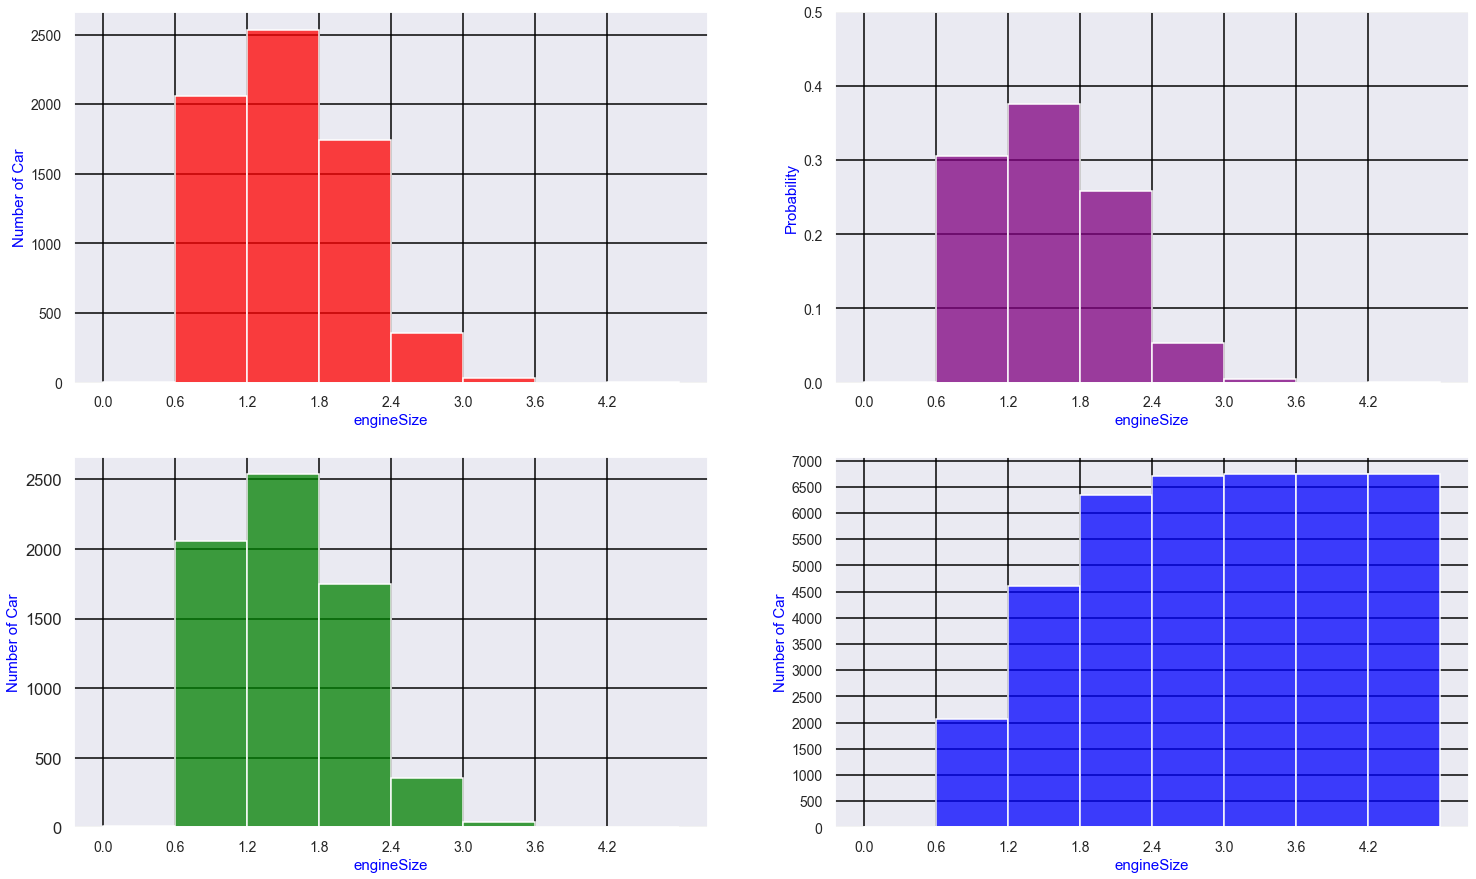

In [963]:
plt.figure(figsize=(25,15))

plt.subplot(2,2,1)
sns.histplot(x = "engineSize", data=df, binwidth=0.6, color="Red")
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14) 
plt.yticks(fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")  #for rename xticks, The boxplate above shows that the engine size of a hybrid car is the smallest between 1.5 and 2.0. Their mpg is 59 to 88 miles per gallon higher than other fuel-type vehicles. The cars that run on diesel their Mileage is the highest from other fuelType cars.                                                    #Cars that run on petrol are cheaper than others
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")


plt.subplot(2,2,2)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="purple", stat = "probability") 
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14)
plt.yticks(np.arange(0, 0.6, 0.1),fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Probability", fontsize = 15, color = "Blue") #rename the variable of y axis and change the fontsize and cover it.
plt.grid(color="Black")


plt.subplot(2,2,3)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="Green")
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14) # "np.arange" is used for arrange the value of x axis 
 
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")


plt.subplot(2,2,4)
sns.histplot(x = "engineSize", data=df, binwidth= 0.6, color="blue" ,cumulative=True) #"cumulative = True " is used for ecdf
plt.xticks(np.arange(df["engineSize"].min(),df["engineSize"].max(), 0.6 ), fontsize = 14)
plt.yticks(np.arange(0,7500,500),fontsize = 14)
plt.xlabel("engineSize", fontsize = 15, color = "Blue")
plt.ylabel("Number of Car", fontsize = 15, color = "Blue")
plt.grid(color="Black")
 

plt.show()


In the above this is a histogram of enginSize. This Histogram has only one peak the modality of this histogram is unimodal.The X-axis represents the size of the car engine and Y-axis represents the total number of cars with respect to the engine size.From this histogram we can easily understand the range of engineSize".
Position 2  histogram shows the probability of the car such as the percentages of 1.2 to 1.8 engine size car are approximate 0.37.
In position 4, this histogram is known as ECDF or Empirical Cumulative Distribution Functions.Difference between position 3 and 4 is in position 3 it is a normal histogram and in p ostion 4 it is ecdf.In this histogram, each bin is the combination of their previous bins.


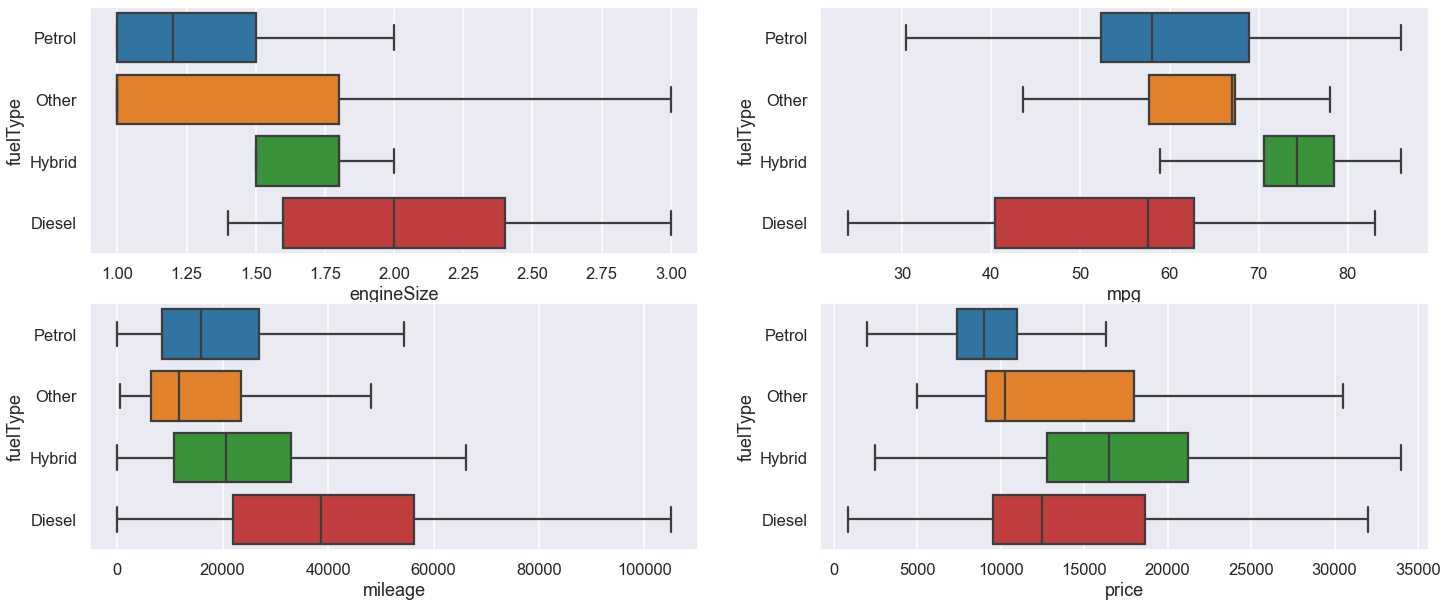

In [964]:
plt.figure(figsize=(24,10))
plt.subplot(2,2,1)
sns.boxplot(x="engineSize",data=df,showfliers=False, y = "fuelType") #"showfair e used for ecdf"



plt.subplot(2,2,2)
sns.boxplot(x="mpg",data=df,showfliers=False, y = "fuelType")


plt.subplot(2,2,3)
sns.boxplot(x="mileage",data=df,showfliers=False, y = "fuelType")



plt.subplot(2,2,4)
sns.boxplot(x="price",data=df,showfliers=False, y = "fuelType")



plt.show()

The boxplate above shows that the engine size of a hybrid car is the smallest between 1.5 and 2.0. Their mpg is 59 to 88 miles per gallon higher than other fuel-type vehicles. The cars that run on diesel their Mileage is the highest from other fuelType cars.Cars that run on petrol are cheaper than others

<p><b>Perform Exploratory Data Analysis (EDA) using groupby/pivot_table and barplot (total 9 barplots), based on model, transmission, and fuelType.</b>
<ul>
<li>A. What are the top 5 selling car models/transmission/fuelType in the dataset?</li>
<li>B. What's the average selling price of the top 5 selling car models/transmission/fuelType?</li>
<li>C. What's the total sale of the top 5 selling car models/transmission/fuelType?</li> </ul></p>

<h4>Using groupby and barplot based on model. </h4>


In [965]:
display(df.head())
# display(df["model"].unique())

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


In [966]:
df_model = df.groupby("model")["price"].agg(["count","mean","sum"])
display(df_model.head())

,count,mean,sum
model,,,
Auris,712,12507.911517,8905633
Avensis,115,9884.356522,1136701
Aygo,1961,7905.414584,15502518
C-HR,479,20651.540710,9892088
Camry,11,26910.090909,296011


<p style="font-size: 17px;font-family:Times New Roman"> From the above dataset, the "Count" column represents the total number of vehicles in each model. This means "the average selling price of each car model. Sum" represents the total price of all the cars in each model. From this dataset there are 712 "Auris" model cars, their average price is 12507.911517 and all 712 "Auris" model cars are priced at 8905663.</p>

In [967]:
#Sorting the dataset based on the count of cars.
df_model = df_model.sort_values(by="count", ascending = False)

# Calculating the Percentages of top 5 Cars model and keep them in new column
df_model["Percentage of Cars"] = (df_model["count"]/df_model["count"].sum())*100 

#total sale of top 5 cars model
df_model["sum"] =  df_model["sum"]/1000000

df_model = df_model.round(2)

df_model = df_model.reset_index() #resetting the index
display(df_model.head())

,model,count,mean,sum,Percentage of Cars
0,Yaris,2122,10553.08,22.39,31.49
1,Aygo,1961,7905.41,15.50,29.10
2,Auris,712,12507.91,8.91,10.57
3,C-HR,479,20651.54,9.89,7.11
4,RAV4,473,18161.06,8.59,7.02


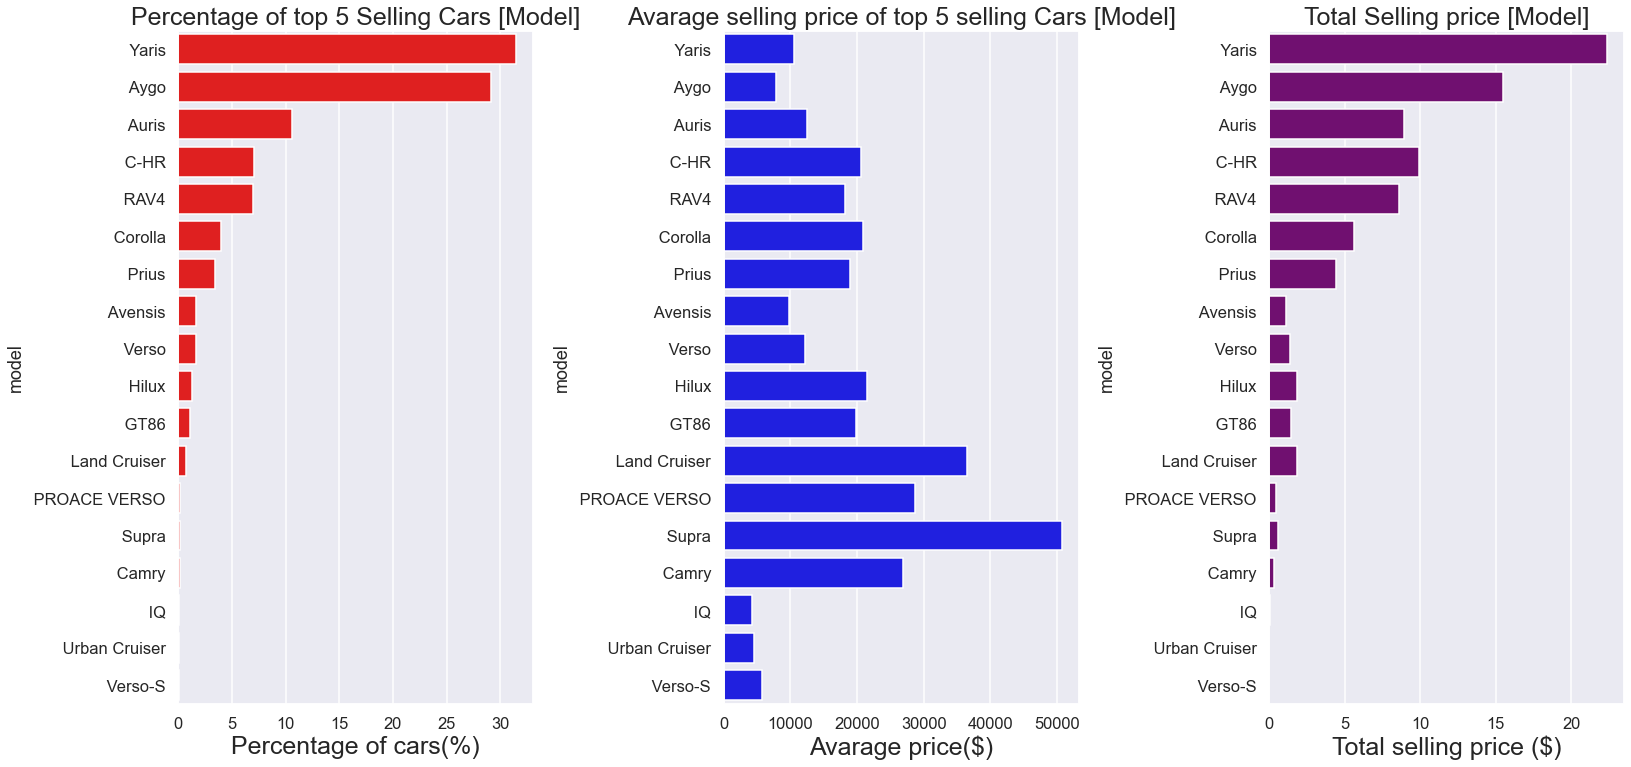

In [968]:
plt.figure(figsize=(23,11))

plt.subplot(1,3,1)
sns.barplot(x= "Percentage of Cars", y="model", data= df_model, color = "red")
plt.xlabel("Percentage of cars(%)", fontsize = 25)
plt.title("Percentage of top 5 Selling Cars [Model]", fontsize = 25)


plt.subplot(1,3,2)
sns.barplot(x= "mean", y="model", data= df_model, color = "blue")
plt.xlabel("Avarage price($)",fontsize = 25)
plt.title("Avarage selling price of top 5 selling Cars [Model]", fontsize = 25)

plt.subplot(1,3,3)
sns.barplot(x= "sum", y="model", data= df_model, color = "purple")
plt.xlabel("Total selling price ($)",fontsize = 25)
plt.title("Total Selling price [Model]", fontsize = 25)



plt.tight_layout()
plt.show()


<p>From above, we noticed that the top 5 car model (by number) in this dataset are: <b> <ol> <li> Yaris (31.49%).</li> <li>AiGo (29.10%).</li> <li>Auris (10.57%).</li> <li>C-HR (7.11%).</li> <li>RAV-4 (7.02%).</li> </ol> </b> <br>

Top 5 average selling prices($) cars model are: <b> <ol> <li> Supra (50,781) </li> <li>Land Cruiser (36,487)</li> <li>ROACE VERSO (28,680)</li> <li>Camry (26,910)</li> <li>Hilux (21,504)</li></ol> </b> <br>

Top 5 Total selling cars model are: <b> <ol> <li>Yaris (22.39M)</li><li>Aygo (15.50M)</li><li>C-HR (9.89M)</li> <li>Auris (8.91M)</li><li>RAV4 (8.59M)</li></ol></b></p>
    

<h4 style="font-size: 17px;font-family:Times New Roman; font-weight: bold;"> Using groupby and barplot based on transmission.</h4>

In [969]:
df_transmission = df.groupby("transmission")["price"].agg(["count","mean","sum"])
display(df_transmission.head())

,count,mean,sum
transmission,,,
Automatic,2657,16582.828754,44060576
Manual,3826,9551.496864,36544027
Other,1,12795.000000,12795
Semi-Auto,254,14797.137795,3758473


<p style="font-size: 17px;font-family:Times New Roman"> The above shows how many cars of each model are transmitted in automatic mode, how many are in manual mode, and how many are semi-auto and other modes of transmission.</p>

In [970]:
#Sorting the dataset based on the count of cars in terms of transmission.
df_transmission = df_transmission.sort_values(by="count", ascending = False)

# Calculating the Percentages of top 5 Cars transmission and keep them in new column
df_transmission["Percentage of Cars"] = (df_transmission ["count"]/df_transmission ["count"].sum())*100

#total sale of the top 5 selling car transmissions
df_transmission["sum"] =  df_transmission ["sum"]/1000000

df_transmission  = df_transmission.round(2)
df_transmission = df_transmission.reset_index() #for reset index
display(df_transmission.head())

,transmission,count,mean,sum,Percentage of Cars
0,Manual,3826,9551.50,36.54,56.78
1,Automatic,2657,16582.83,44.06,39.43
2,Semi-Auto,254,14797.14,3.76,3.77
3,Other,1,12795.00,0.01,0.01


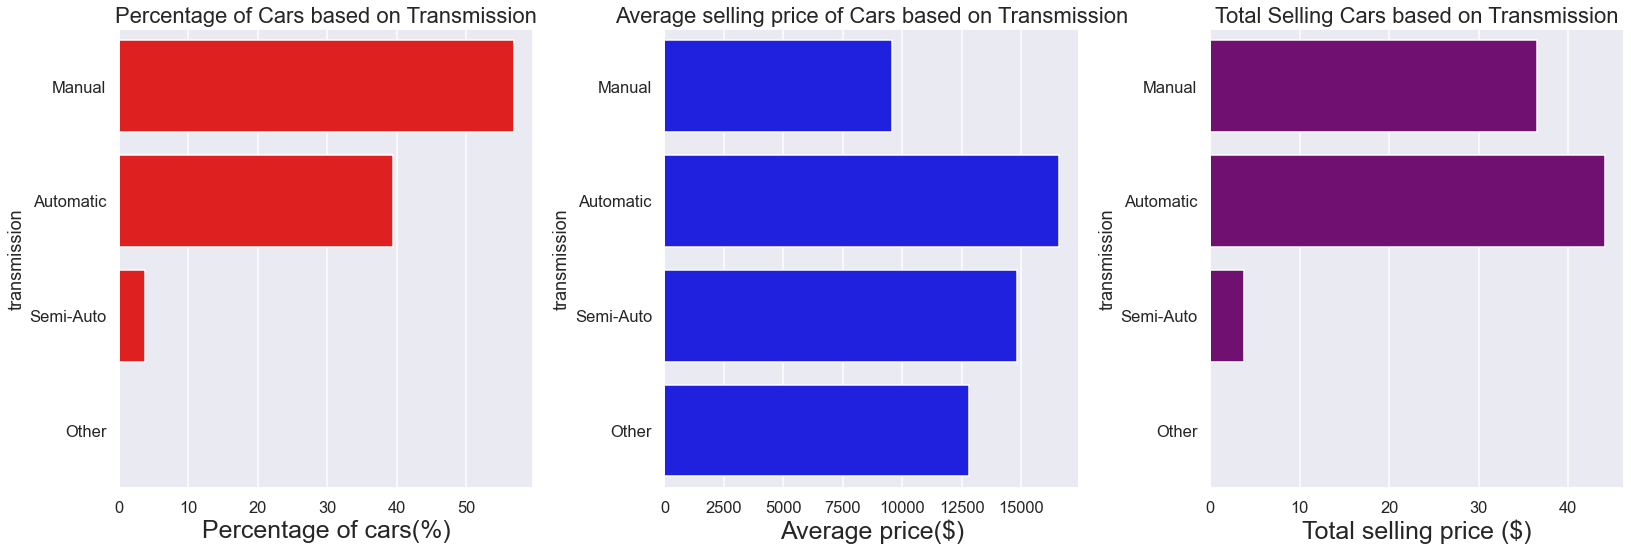

In [971]:
plt.figure(figsize=(23,8))

plt.subplot(1,3,1)
sns.barplot(x= "Percentage of Cars", y="transmission", data= df_transmission, color = "red")
plt.xlabel("Percentage of cars(%)", fontsize = 25)
plt.title("Percentage of Cars based on Transmission",fontsize = 22)

plt.subplot(1,3,2)
sns.barplot(x= "mean",  y="transmission", data=df_transmission, color = "blue")
plt.xlabel("Average price($)",fontsize = 25)
plt.title("Average selling price of Cars based on Transmission",fontsize = 22)


plt.subplot(1,3,3)
sns.barplot(x= "sum",  y="transmission", data= df_transmission, color = "purple")
plt.xlabel("Total selling price ($)",fontsize = 25)
plt.title("Total Selling Cars based on Transmission",fontsize = 22)


plt.tight_layout()
plt.show()

<p>From above figure,
<ul><li>In this dataset the most of the car's transmission is based on the manual (56.78%).</li>
<li>The highest average selling price by transmission is Automatic.</li>
<li>The total selling cars based on transmission are Automatic(44.06M), Mannual(36.54M), Semi-Auto(3.76M).</li>
</p>

<h4 style="font-size: 17px;font-family:Times New Roman; font-weight: bold;">Using groupby and barplot based on fuelType.</h4>


In [972]:
df_fuelType = df.groupby("fuelType")["price"].agg(["count","mean","sum"])
display(df_fuelType.head(10))


,count,mean,sum
fuelType,,,
Diesel,503,15697.807157,7895997
Hybrid,2043,17185.472834,35109921
Other,105,14121.161905,1482722
Petrol,4087,9759.537803,39887231


In [973]:
df_fuelType = df_fuelType.sort_values(by="count", ascending = False)

#calculating top 5 selling car fuelType
df_fuelType["Percentage of Cars"] = (df_fuelType ["count"]/df_fuelType ["count"].sum())*100

#otal sale of the top 5 selling car fuelType
df_fuelType["sum"] = df_fuelType["sum"]/1000000

df_fuelType = df_fuelType.round(2)

df_fuelType = df_fuelType.reset_index()

display(df_fuelType)

,fuelType,count,mean,sum,Percentage of Cars
0,Petrol,4087,9759.54,39.89,60.66
1,Hybrid,2043,17185.47,35.11,30.32
2,Diesel,503,15697.81,7.90,7.47
3,Other,105,14121.16,1.48,1.56


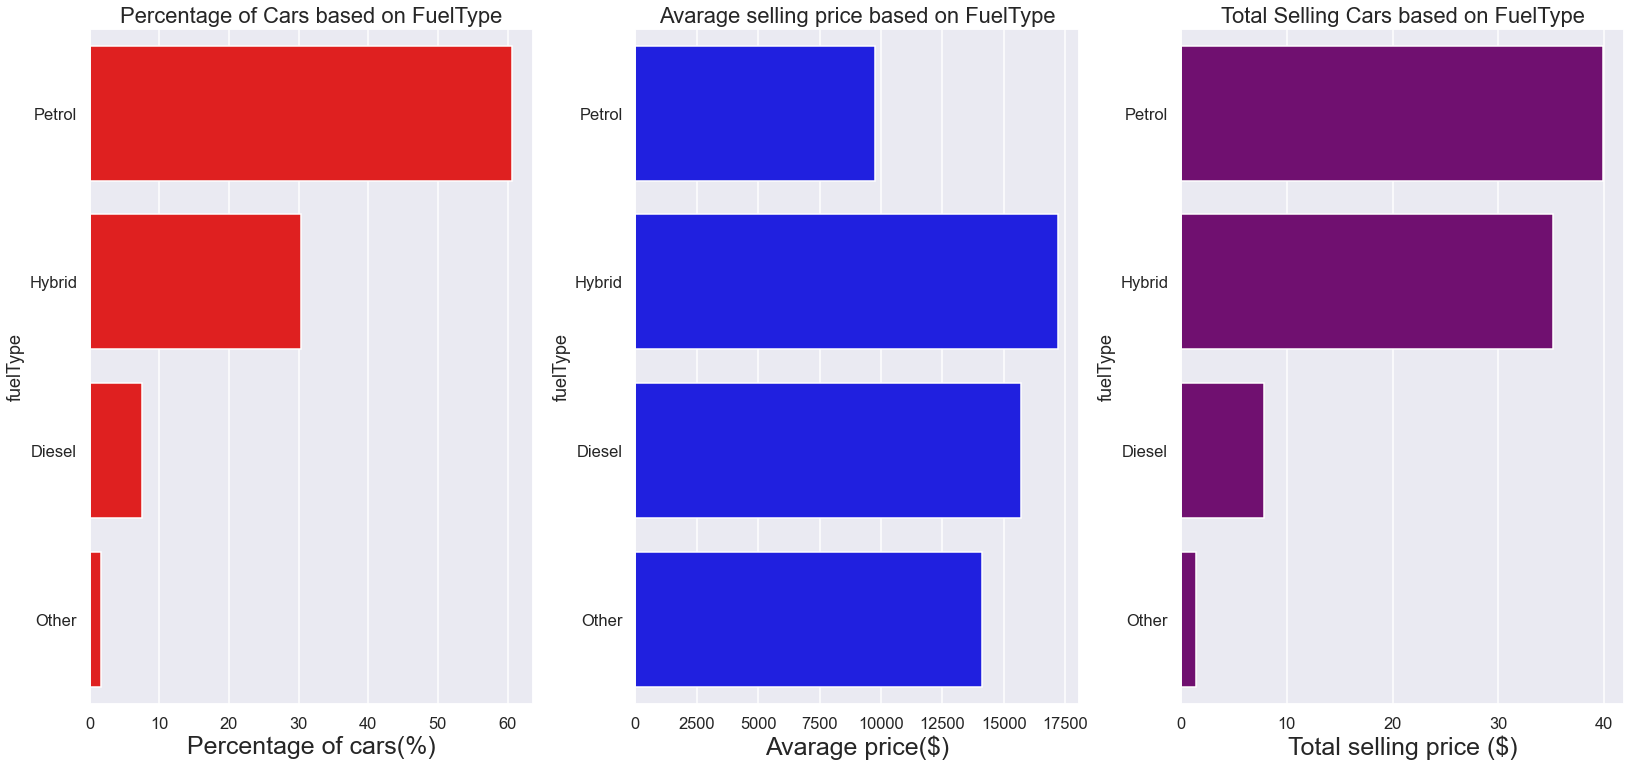

In [974]:
plt.figure(figsize=(23,11))


plt.subplot(1,3,1)
sns.barplot(x= "Percentage of Cars", y="fuelType", data= df_fuelType, color = "red")
plt.xlabel("Percentage of cars(%)",fontsize = 25)
plt.title("Percentage of Cars based on FuelType",fontsize = 22)

plt.subplot(1,3,2)
sns.barplot(x= "mean",  y="fuelType", data=df_fuelType, color = "blue")
plt.xlabel("Avarage price($)",fontsize = 25)
plt.title("Avarage selling price based on FuelType",fontsize = 22)


plt.subplot(1,3,3)
sns.barplot(x= "sum", y="fuelType", data = df_fuelType, color = "purple")
plt.xlabel("Total selling price ($)",fontsize = 25)
plt.title("Total Selling Cars based on FuelType",fontsize = 22)


plt.tight_layout()
plt.show()

<ul>
<li>From the above barplot, it is seen that "Petrol(60.66)" is the highest fuelType for most cars.</li>
<li>Based on fuelType "Hybrid" cars' average selling price is the highest.</li>
<li>"Petrol" based cars' total selling price by fuelType is almost 40M. It is the highest total selling price car based on fuelType.  and the second highest total selling cars based on fuelType is Hybrid".</li>

In [975]:
# df.info()

In [976]:
# display(df.head(5))

In [977]:
# display(df.tail(5))

<h1 style ="font-family:Times New Roman; font-weight: bold;">Linear Regression.</h1>

<h4 style="font-size: 18px;font-family:Times New Roman; font-weight: bold;"> Load the Data.</h4>


In [978]:
df = pd.read_csv("toyota.csv")  #This function is used to load the data from csv file.

display(df.head())  # display the top 5 row of the dataframe. 
display(df.shape)  # display the number of row and column in the dataset. 

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,GT86,2016,16000,Manual,24089,Petrol,36.2,2.0
1,GT86,2017,15995,Manual,18615,Petrol,36.2,2.0
2,GT86,2015,13998,Manual,27469,Petrol,36.2,2.0
3,GT86,2017,18998,Manual,14736,Petrol,36.2,2.0
4,GT86,2017,17498,Manual,36284,Petrol,36.2,2.0


(6738, 8)

In [979]:
df.info() # display the whole information of the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6738 non-null   object 
 1   year          6738 non-null   int64  
 2   price         6738 non-null   int64  
 3   transmission  6738 non-null   object 
 4   mileage       6738 non-null   int64  
 5   fuelType      6738 non-null   object 
 6   mpg           6738 non-null   float64
 7   engineSize    6738 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 421.2+ KB


<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;"> Separating the numeric features and target variable </h4>

In [980]:
# creating new list of numeric feature and target variable. 
feature = ["year","mileage","mpg","engineSize"]
target = ["price"]

# Creating two different dataset of numeric feature and target variable. 
feature_update = df[feature]
target_update = df[target]

display(feature_update.head())
display("Shape of feature=",feature_update.shape)
display(target_update.head())
display("Shape of target=",target_update.shape)

,year,mileage,mpg,engineSize
0,2016,24089,36.2,2.0
1,2017,18615,36.2,2.0
2,2015,27469,36.2,2.0
3,2017,14736,36.2,2.0
4,2017,36284,36.2,2.0


'Shape of feature='

(6738, 4)

,price
0,16000
1,15995
2,13998
3,18998
4,17498


'Shape of target='

(6738, 1)

<p style="font-size:18px; font-family:Times New Roman;">In this section, i am separating the numeric feature and target variable from the dataset.Creatng new list named feature and target, Keep all numeric columns and the target variable column in these list.Then create new datafram for numeric feature and target variables.</p> 

<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;">Split the original dataset into the train set (80%) and the test set (20%)</h4>

In [981]:

#spliting the orginal dataset into the train set 80% 
feature_train, feature_test, price_train, price_test = train_test_split(feature_update,         
                                                                        target_update,         
                                                                        train_size = 0.8,
                                                                        random_state= 88)

print(feature_train.shape, feature_test.shape, price_train.shape, price_test.shape)

(5390, 4) (1348, 4) (5390, 1) (1348, 1)


In [982]:
display(feature_train.head(),feature_test.head(),price_train.head(),price_test.head())

,year,mileage,mpg,engineSize
1826,2014,47481,72.4,1.4
595,2016,38000,55.4,2.5
334,2019,3568,72.4,2.0
4665,2017,18381,67.0,1.0
3241,2017,9596,70.6,1.8


,year,mileage,mpg,engineSize
2151,2017,6400,76.3,1.5
3978,2019,5519,56.5,1.0
1706,2017,2563,86.0,1.5
257,2019,6329,39.2,1.2
2842,2015,26986,86.0,1.5


,price
1826,6100
595,22075
334,23250
4665,8495
3241,18379


,price
2151,13200
3978,8495
1706,13256
257,16821
2842,9500


<h3 style="font-family:Times New Roman; font-size:20px; font-weight: bold;">Perform Linear Regression and Predict the 'Price' from the test set</h3>

<h4 style="font-family:Times New Roman; font-size:18px; color: purple; font-weight: bold;"> Linear Regression </h4>

In [983]:
model = LinearRegression() #Instantiating a LinearRegression Model
model = model.fit(feature_train,price_train) #used to train a model. 

<h4 style="font-family:Times New Roman; font-size:18px; color: purple; font-weight: bold;">Predict the 'Price' from the test set</h4>

In [984]:
#predict the price from feature_test
price_predict = model.predict(feature_test) 
print(price_predict)

[[14684.85306654]
 [10195.60147303]
 [15214.36628728]
 ...
 [23121.03801779]
 [14480.91303411]
 [ 7460.8312554 ]]


In [985]:
display(price_test.head())

,price
2151,13200
3978,8495
1706,13256
257,16821
2842,9500


<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;"> Find the RMSE, MAE, MAPE, MSE, and R squared KPIs from the actual test data and the predicted data.</h4>

In [986]:
#RMSE[Root Mean Squared Error]
RMSE = np.round(mean_squared_error(price_test,price_predict,squared=False),2)
print("RMSE is =",RMSE)

#MAE_[Mean absolute error]
MAE = np.round(mean_absolute_error(price_test,price_predict),2)
print("MAE is =",MAE)

#MAPE[Mean Absolute Percentage Error ]
MAPE = np.round(mean_absolute_percentage_error(price_test,price_predict)*100,2)
print("MAPE is =",MAPE)

#MSE[Mean Squared Error] 
MSE = np.round(mean_squared_error(price_test,price_predict,squared=True),2)
print("MSE is =",MSE)

#R squared [Coefficient of determination or R-squared]
R_Square = np.round(r2_score(price_test,price_predict),2)
print("R_Square is =",R_Square)

RMSE is = 2964.29
MAE is = 2112.25
MAPE is = 20.4
MSE is = 8786995.27
R_Square is = 0.77


<p>KPI stands for Key Performance Indicators, from which we can understand the performane of our model.Here we find out the different types of KPI such as RMSE,R square, MAPE etc. From the upper cell we see that:
<ul>
    <li>Root Mean Squared Error (RMSE) of this model is 2964.29.So according to RMSE, the predicted price of all cars is 2964.29 USD more or 2964.29 USD less.</li>
    <li>Mean Absolute Error (MAE) of ths model is 2112.25.So according to MAE, the predicted price of all cars is 2112.25 USD more or 2112.25 USD less.</li>
    <li>Mean Absolute Percentage Error (MAPE) of this model is 20.4%. So according to MAPE, the predicted price of all cars is 20.4% higher or 20.4% lower.</li>
    <li>Mean Squared Error (MSE) of this model is 8786995.27.So according to RMSE, the predicted price of all cars is 2964.29 more or $2964.29 less.</li>
    <li>Coefficient of determination or R-squared of this model is 0.77.According to the R-squared this model is not good enough.</li>
</ul>
Except for R-squared If all of these KPIs are lower, the model is better and vice-versa.If the value of these KPI is Zero, then the prediction price of this model is good.
</p>

<h4 style="font-family:Times New Roman; font-size:22px; font-weight: bold; "> Perform Label Encoding or One-hot Encoding <br> 
<br><div style="color:purple; font-size:18;"> Label Encoding </div>
<br><div style="font-size:15;"> Load the data </div> </h4>

In [987]:
#load the data from the csv file
df_new = pd.read_csv("Copy_toyota.csv")

display(df_new.sample(5))
print(df_new.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
452,RAV4,2017,16675,Manual,22565,Diesel,60.1,2.0
2721,Yaris,2013,9990,Automatic,27000,Hybrid,76.3,1.5
4465,Aygo,2019,9491,Manual,1855,Petrol,57.7,1.0
2618,Yaris,2018,12999,Automatic,7857,Hybrid,76.3,1.5
3747,Aygo,2017,6298,Manual,27695,Petrol,69.0,1.0


(6738, 8)


<p style="font-size:18px; font-family:Times New Roman;">I have created a new CSV file named <b>"Copy_toyota.csv"</b> by copying the actual dataset file <b>"toyota.csv"</b> so that i can compare the results of errors after doing one-hot encoding and label encoding.</p>

<h4 style="font-family:Times New Roman; font-size:18px;font-weight: bold;">Label Encoding </h4>

In [988]:
#Displaying the shape of dataset before convert catagorical feature to numeric.
display(df_new.shape)

#converting categorical feature to numeric.

LE = LabelEncoder() #initiating Label encoding

df_new["transmission_"] = LE.fit_transform(df_new["transmission"]) # "fit_transfrom" used to transfrom the the catagorical feature to numeric

df_new["model_"] = LE.fit_transform(df_new["model"])

df_new["fuelType_"] = LE.fit_transform(df_new["fuelType"])

display(df_new.sample(5))
display(df_new.shape)


(6738, 8)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,transmission_,model_,fuelType_
1755,Yaris,2019,13192,Manual,5937,Petrol,47.9,1.5,1,17,3
4837,Aygo,2018,8495,Manual,11719,Petrol,68.9,1.0,1,2,3
5285,Aygo,2017,6000,Manual,22452,Petrol,69.0,1.0,1,2,3
4274,Aygo,2018,8495,Manual,19558,Petrol,56.5,1.0,1,2,3
1166,Yaris,2017,10440,Automatic,13000,Petrol,58.0,1.3,0,17,3


(6738, 11)

In [989]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6738 entries, 0 to 6737
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   model          6738 non-null   object 
 1   year           6738 non-null   int64  
 2   price          6738 non-null   int64  
 3   transmission   6738 non-null   object 
 4   mileage        6738 non-null   int64  
 5   fuelType       6738 non-null   object 
 6   mpg            6738 non-null   float64
 7   engineSize     6738 non-null   float64
 8   transmission_  6738 non-null   int32  
 9   model_         6738 non-null   int32  
 10  fuelType_      6738 non-null   int32  
dtypes: float64(2), int32(3), int64(3), object(3)
memory usage: 500.2+ KB


<h4 style="font-size:18px;font-family:Times New Roman;font-weight: bold;"> Separating the numeric features and target variable for Label Encoding </h4>

In [990]:
print(df_new.columns)

# creating new list of numeric feature and target variable. 
feature_copy = ['model_', 'year', 'transmission_', 'mileage', 'fuelType_', 'mpg','engineSize']
target_copy = ["price"]


# Creating two different dataset of numeric feature and target variable. 
feature_up = df_new[feature_copy]
target_up = df_new[target_copy]


display(feature_up.head())
display("Shape of feature=",feature_up.shape)
display(target_up.head())
display("Shape of target=",target_up.shape)

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize', 'transmission_', 'model_', 'fuelType_'],
      dtype='object')


,model_,year,transmission_,mileage,fuelType_,mpg,engineSize
0,6,2016,1,24089,3,36.2,2.0
1,6,2017,1,18615,3,36.2,2.0
2,6,2015,1,27469,3,36.2,2.0
3,6,2017,1,14736,3,36.2,2.0
4,6,2017,1,36284,3,36.2,2.0


'Shape of feature='

(6738, 7)

,price
0,16000
1,15995
2,13998
3,18998
4,17498


'Shape of target='

(6738, 1)

<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;">Split the original dataset into the train set (80%) and the test set (20%) for Label Encoding</h4>

In [991]:
features_train, features_test, target_train, target_test = train_test_split(feature_up,         
                                                                        target_up,         
                                                                        test_size = 0.2,
                                                                        random_state= 88)
print(features_train.shape, features_test.shape, target_train.shape, target_test.shape)

(5390, 7) (1348, 7) (5390, 1) (1348, 1)


<h4 style="font-family:Times New Roman; font-size:22px; font-weight: bold;">Perform Linear Regression and Predict the 'Price' from the test set. </h4>

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;"> Linear Regression </h4>

In [992]:
Model_new = LinearRegression() #Instantiating a LinearRegression Model
Model_new = Model_new.fit(features_train,target_train)   # used to train a model

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;">Predict the 'Price' from the test set</h4>

In [993]:
price_predict = Model_new.predict(features_test)
print(price_predict)

display(target_test.head())

[[13830.33863563]
 [10820.89174731]
 [14246.23971747]
 ...
 [22967.62176438]
 [13254.28081065]
 [ 7914.93328666]]


,price
2151,13200
3978,8495
1706,13256
257,16821
2842,9500


<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;">Show the coefficients of your linear regression model for each feature and show the y-intercept value of your linear regression model.</h4>

In [994]:
#Coeffecient
coefficient = Model_new.coef_
print("Coefficient =",coefficient)

#create a dataframe for coeffecient 

coef = pd.DataFrame({"Feature":feature_up.columns,
                     "Coefficients": np.squeeze(coefficient)})
display(coef)

#Intercept
c = Model_new.intercept_
print("Y-axis Intercept (c) =",c)


Coefficient = [[-1.21096302e+02  7.95481005e+02 -2.66905257e+02 -8.32277776e-02
  -1.32387675e+02  9.95423704e+00  1.15228052e+04]]


,Feature,Coefficients
0,model_,-121.096302
1,year,795.481005
2,transmission_,-266.905257
3,mileage,-0.083228
4,fuelType_,-132.387675
5,mpg,9.954237
6,engineSize,11522.805186


Y-axis Intercept (c) = [-1605974.88262224]


In above we create a dataframe to show the relation between feature and coeffeicients. Here Negative sign indicates that if the feature variable increase then the target variables decrease and  positive sign indicates that if the feature variable increase then the target variables also increase.

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;">Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.</h4>

In [995]:
#RMSE[Root Mean Squared Error]
RMSE = np.round(mean_squared_error(target_test,price_predict,squared=False),2)
print("RMSE is =",RMSE)

#MAE_[Mean absolute error]
MAE = np.round(mean_absolute_error(target_test,price_predict),2)
print("MAE is =",MAE)

#MAPE[Mean Absolute Percentage Error ]
MAPE = np.round(mean_absolute_percentage_error(target_test,price_predict)*100,2)
print("MAPE is =",MAPE)

#MSE[Mean Squared Error] 
MSE = np.round(mean_squared_error(target_test,price_predict,squared=True),2)
print("MSE is =",MSE)

#R squared [Coefficient of determination or R-squared]
R_Square = np.round(r2_score(target_test,price_predict),2)
print("R_Square is =",R_Square)

RMSE is = 2859.54
MAE is = 2035.19
MAPE is = 20.2
MSE is = 8176984.79
R_Square is = 0.78


<p> From the upper result it has seen that
<ul>
        <li>Root Mean Squared Error (RMSE) of this model is 2859.54.</li>
        <li>Mean Absolute Error (MAE) of ths model is 2035.19.</li>
        <li>Mean Absolute Percentage Error (MAPE) of this model is 20.2%.</li>
        <li>Mean Squared Error (MSE) of this model is 8176984.79</li>
        <li>Coefficient of determination or R-squared of this model is 0.78.</li>
</ul>
</p>

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;"> Compare the actual and predicted target variable through visualization </h4>

In [1009]:
target_test["Predicted_price"]= price_predict 
target_test["X"] = np.arange(0,1348,1)

# price_test.info()
display(target_test.head(5))

,price,Predicted_price,X
2151,13200,13830.338636,0
3978,8495,10820.891747,1
1706,13256,14246.239717,2
257,16821,12522.541079,3
2842,9500,10622.605695,4


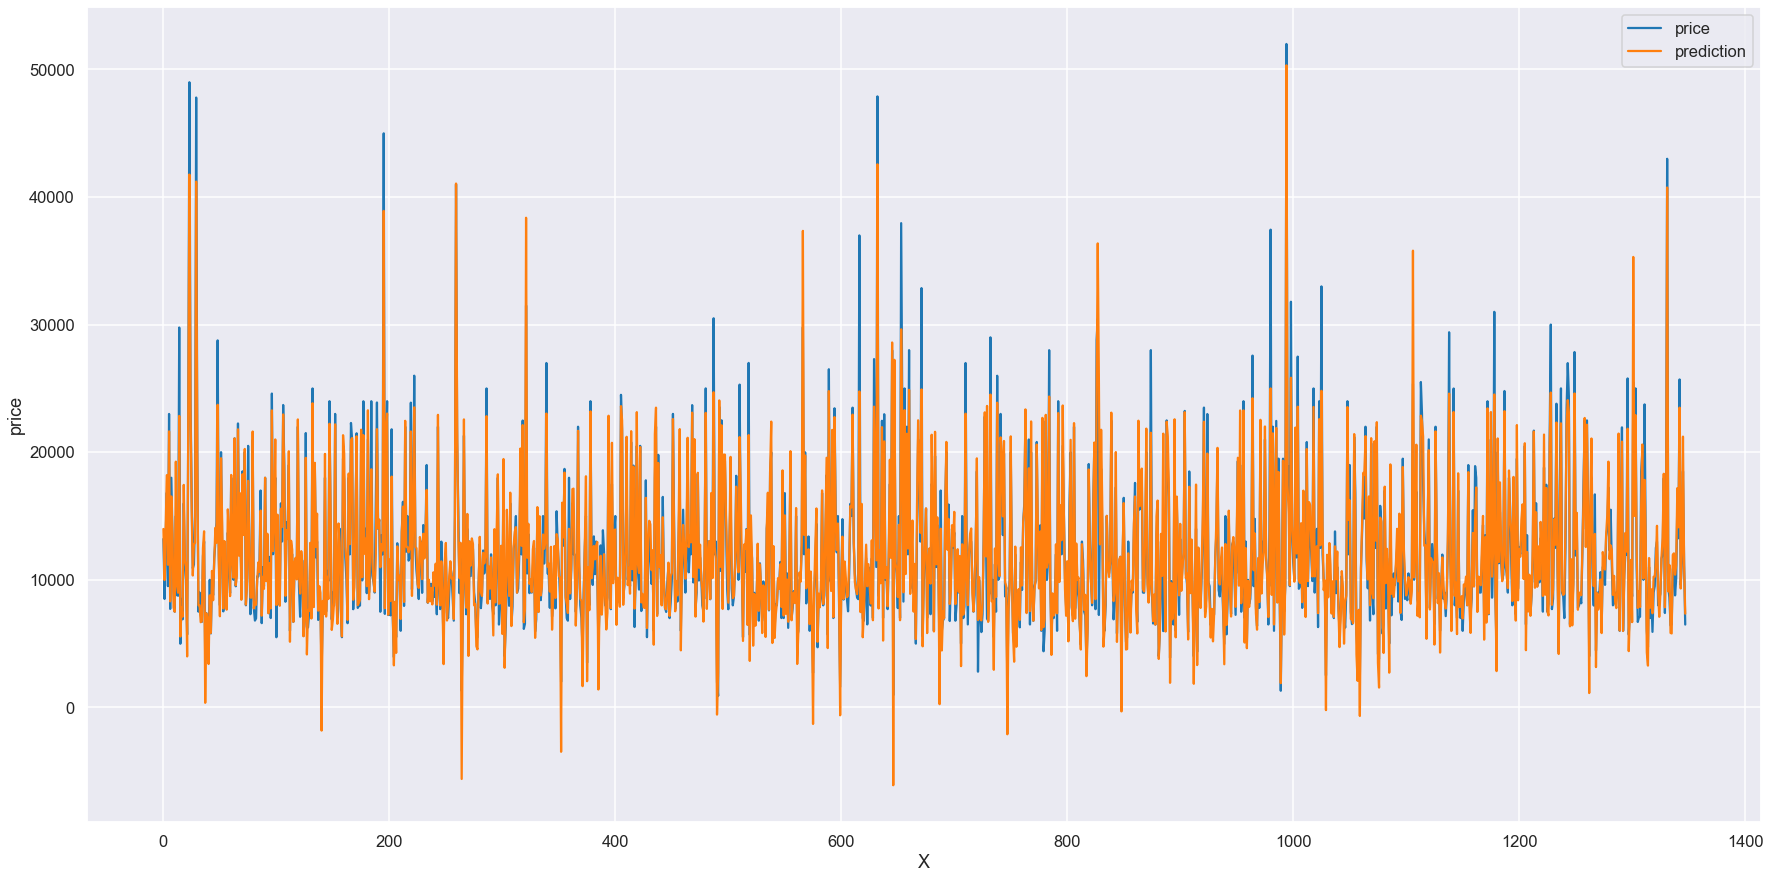

In [1010]:
plt.figure(figsize=(30,15))

sns.lineplot(x= "X",y="price", data=price_test,label="price")
sns.lineplot(x= "X",y="Predicted_price", data=price_test,label="prediction")

plt.show()

<p style="font-family:Times New Roman; font-size:18px;"> From the upper visualization, we can say the model is not good enough as the difference between actual price and predicted price is high for a lot of cars. It also shows from this visualization that sometimes the value of the predicted price is negative, which is a major fault of this model. This can be improved by reducing the number of features, by cross-validation or in another way.</p>

<h4 style="font-family:Times New Roman; font-size:20px; font-weight: bold; color:purple;">One-hot Encoding </h4>

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;">Displaying the Load data</h4>

In [997]:
display(df.sample(5))
display(df.shape)

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
2746,Yaris,2017,11600,Automatic,48144,Hybrid,78.0,1.5
3497,Auris,2017,11699,Manual,17546,Petrol,52.3,1.2
2050,Yaris,2019,14995,Manual,1899,Petrol,47.9,1.5
618,RAV4,2016,15995,Manual,37531,Diesel,60.1,2.0
4091,Aygo,2016,6270,Manual,20563,Petrol,69.0,1.0


(6738, 8)

<h4 style="font-family:Times New Roman; font-size:18px;font-weight: bold;">One-hot Encoding </h4>

In [998]:
#Convert categorical variable into dummy/ numerical variables.
df = pd.get_dummies(df)
display(df.sample(5))
display(df.shape)

,year,price,mileage,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
5844,2019,23688,9651,74.3,1.8,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
4430,2016,6602,23909,69.0,1.0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
6651,2020,44995,200,30.1,2.8,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
5168,2017,8274,11812,67.0,1.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1765,2017,11695,5938,58.0,1.3,0,0,0,0,0,...,0,1,1,0,0,0,0,0,0,1


(6738, 31)

<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;" > Separating the numeric features and target variable for One-hot Encoding </h4>

In [999]:
feature_new = df.drop(["price"],axis=1)

display(target_update.head())
display(feature_new.head())

,price
0,16000
1,15995
2,13998
3,18998
4,17498


,year,mileage,mpg,engineSize,model_ Auris,model_ Avensis,model_ Aygo,model_ C-HR,model_ Camry,model_ Corolla,...,model_ Verso-S,model_ Yaris,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2016,24089,36.2,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,2017,18615,36.2,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2015,27469,36.2,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,2017,14736,36.2,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,2017,36284,36.2,2.0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;">Split the original dataset into the train set (80%) and the test set (20%) for One-hot Encoding</h4>

In [1000]:
feature_train, feature_test, price_train, price_test = train_test_split(feature_new,         
                                                                        target_update,         
                                                                        test_size = 0.2,
                                                                        random_state= 88)
print(feature_train.shape, feature_test.shape, price_train.shape, price_test.shape)

(5390, 30) (1348, 30) (5390, 1) (1348, 1)


<h4 style="font-size:18px;font-family:Times New Roman; font-weight: bold;"> Linear Regression for One-hot Encoding</h4>

In [1001]:
model_new = LinearRegression()
model_new = model_new.fit(feature_train,price_train)  #train the model

<h4 style="font-family:Times New Roman; font-size:18px;font-weight: bold;">Predict the 'Price' from the test set</h4>

In [1002]:
newPrice_predict = model_new.predict(feature_test)
print(newPrice_predict)

display(price_test.head())

[[13981.92578934]
 [ 9974.84330741]
 [14141.61359849]
 ...
 [21219.339514  ]
 [11204.05044867]
 [ 7344.28174611]]


,price
2151,13200
3978,8495
1706,13256
257,16821
2842,9500


<h4 style="font-family:Times New Roman; font-size:18px;font-weight: bold;">Show the coefficients of linear regression model for each feature and show the y-intercept value of your linear regression model.</h4>

In [1003]:
coeffecients_new = model_new.coef_
display("Coefficient=",coeffecients_new)

#create new dataframe for showing the coefficient feature columns
feature_coeffecients= pd.DataFrame({"feature":feature_new.columns,
                                    "coeffecients":np.squeeze(coeffecients_new)})
display(feature_coeffecients.head(5))

c_new = model_new.intercept_
print("Y-axis intercept(c)=",c_new)

'Coefficient='

array([[ 7.57013258e+02, -5.94578608e-02, -7.05690749e+00,
         2.62065465e+03, -5.91425672e+03, -4.56065038e+03,
        -8.74536674e+03, -5.26601897e+02,  9.99396996e+02,
        -1.11899593e+03,  3.10328004e+02,  2.41761384e+03,
        -6.41282645e+03,  1.81567264e+04,  7.43881364e+03,
        -1.07461823e+03, -1.03531298e+03,  2.49554379e+04,
        -6.12531910e+03, -4.92262751e+03, -6.31784358e+03,
        -7.52389725e+03,  9.11533537e+01, -1.15200499e+03,
         1.04462890e+03,  1.62227371e+01, -2.02345075e+03,
         1.45924218e+03,  1.04322936e+03, -4.79020797e+02]])

,feature,coeffecients
0,year,757.013258
1,mileage,-0.059458
2,mpg,-7.056907
3,engineSize,2620.654650
4,model_ Auris,-5914.256724


Y-axis intercept(c)= [-1509952.3231594]


<p style="font-family:Times New Roman; font-size:18px;"> In above we create a dataframe to show the relation between feature and coeffeicients. Here Negative sign indicates that if the feature variable increase then the target variables decrease and positive sign indicates that if the feature variable increase then the target variables also increase.</p>

<h4 style="font-family:Times New Roman; font-size:18px;font-weight: bold;">Find the MAE, MAPE, MSE, RMSE, coefficient of determination values from the actual target variable and the predicted target variable.</h4>

In [1004]:
#RMSE[Root Mean Squared Error]
RMSE = np.round(mean_squared_error(price_test,newPrice_predict,squared=False),2)
print("RMSE is =",RMSE)

#MAE_[Mean absolute error]
MAE = np.round(mean_absolute_error(price_test,newPrice_predict),2)
print("MAE is =",MAE)

#MAPE[Mean Absolute Percentage Error ]
MAPE = np.round(mean_absolute_percentage_error(price_test,newPrice_predict)*100,2)
print("MAPE is =",MAPE)

#MSE[Mean Squared Error] 
MSE = np.round(mean_squared_error(price_test,newPrice_predict,squared=True),2)
print("MSE is =",MSE)

#R squared [Coefficient of determination or R-squared]
R_Square = np.round(r2_score(price_test,newPrice_predict),2)
print("R_Square is =",R_Square)

RMSE is = 1847.88
MAE is = 1118.18
MAPE is = 11.9
MSE is = 3414664.3
R_Square is = 0.91


<p> From the upper result it has seen that
<ul>
        <li>Root Mean Squared Error (RMSE) of this model is 1847.88</li>
        <li>Mean Absolute Error (MAE) of ths model is 1118.18</li>
        <li>Mean Absolute Percentage Error (MAPE) of this model is 11.9%.</li>
        <li>Mean Squared Error (MSE) of this model is 3414664.3</li>
        <li>Coefficient of determination or R-squared of this model is 0.91</li>
</ul>
</p>

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;"> Which one is best suitable for analysis between Label Encoding and One-hot Encoding?</h4>

<p style="font-family:Times New Roman; font-size:18px;">From above analysis we noticed that between label encoding and One-hot encoding, One-hot encoding is the best suitable for this cars dataset.In One-hot encoding the difference between actual data and predicted data is lower than the Label Encoding.</p>

<h4 style="font-family:Times New Roman; font-size:18px; font-weight: bold;"> Compare the actual and predicted target variable through visualization </h4>

In [1005]:
price_test["Predicted_price"]= newPrice_predict 
price_test["X"] = np.arange(0,1348,1)

# price_test.info()
display(price_test.head(5))


,price,Predicted_price,X
2151,13200,13981.925789,0
3978,8495,9974.843307,1
1706,13256,14141.613598,2
257,16821,18199.268682,3
2842,9500,11175.447749,4


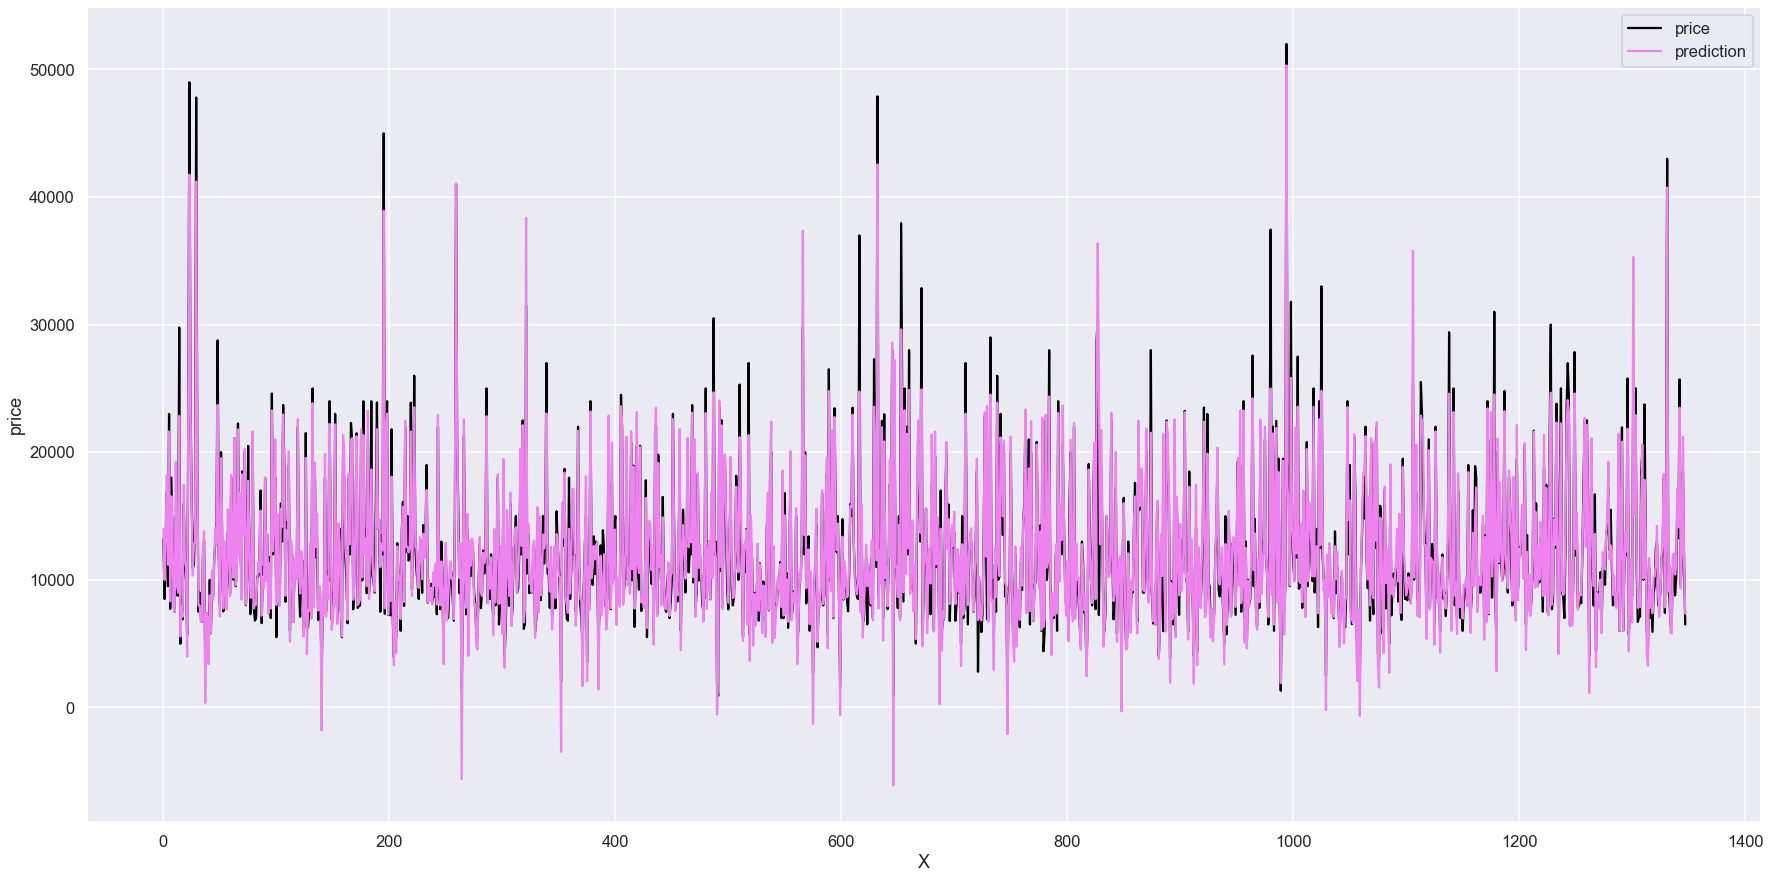

In [1006]:
plt.figure(figsize=(30,15))

sns.lineplot(x= "X",y="price", data=price_test,label="price",color = "black")
sns.lineplot(x= "X",y="Predicted_price", data=price_test,label="prediction",color = "violet")

plt.show()

<p style="font-family:Times New Roman; font-size:18px;"> From the upper visualization, we can say the model is not good enough as the difference between actual price and predicted price is high for a lot of cars. It also shows from this visualization that sometimes the value of the predicted price is negative, which is a major fault of this model. This can be improved by reducing the number of features, by cross-validation or in another way.</p>